# import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Read the data

In [2]:
url='https://raw.githubusercontent.com/goradbj/MachineLearning/main/Classification/Logistic%20Regression/insurance_data.csv'
df=pd.read_csv(url)

In [3]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


# understand clean & preprocess the data

In [4]:
df.shape

(27, 2)

In [5]:
df.size

54

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [7]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [8]:
df.isnull().sum()

age                 0
bought_insurance    0
dtype: int64

# data visualization

Text(0.5, 1.0, 'To establish relation betn age & having insurance')

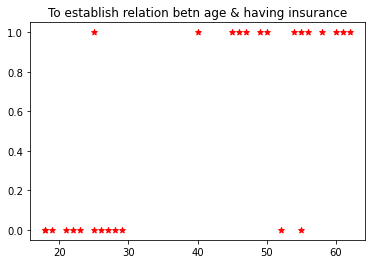

In [9]:
plt.scatter(df.age,df.bought_insurance,marker='*',color='red')
plt.xlabel='age'
plt.ylabel='bought_insurance'
plt.title('To establish relation betn age & having insurance')

As from this graph we can understand there is no linear reationship so we can proceed for classification

# Divide the data1

In [10]:
x=df[['age']]
x

,age
0,22
1,25
2,47
3,52
4,46
5,56
6,55
7,60
8,62
9,61


In [11]:
y=df[['bought_insurance']]
y

,bought_insurance
0,0
1,0
2,1
3,0
4,1
5,1
6,0
7,1
8,1
9,1


In [12]:
x.shape

(27, 1)

In [13]:
y.shape

(27, 1)

# Split the data for training and testing

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21, 1)
(6, 1)
(21, 1)
(6, 1)


# Build model now

In [16]:
prmodel=LogisticRegression()

In [17]:
prmodel.fit(x_train,y_train)

/home/pratibhaantre/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [18]:
#value of m
prmodel.coef_

array([[0.14507498]])

In [19]:
#value of c
prmodel.intercept_

array([-5.06929044])

# mathematical model of this example 

1/(1+e^(0.20997242^z-8.78258551))

In [20]:
x_test,y_test

(    age
 18   19
 12   27
 11   28
 3    52
 20   21
 8    62,
     bought_insurance
 18                 0
 12                 0
 11                 0
 3                  0
 20                 0
 8                  1)

In [21]:
y_pred=prmodel.predict(x_test)

In [22]:
y_pred

array([0, 0, 0, 1, 0, 1])

In [23]:
prmodel.predict([[20]])

array([0])

In [24]:
prmodel.predict([[50]])

array([1])

In [25]:
prmodel.score(x_test,y_test)

0.8333333333333334

# save model for deployment

#model can be saved by using
1.pickle
2.jobib

# pickle

In [28]:
import pickle

In [32]:
#how to save model
pickle.dump(prmodel,open('classifiation model.sav','wb'))

In [35]:
#how to load model
prmodel1=pickle.load(open('classifiation model.sav','rb'))

# joblib

In [36]:
import joblib

In [46]:
#how to save model
joblib.dump(prmodel,('classifiation model.sav'))

['classifiation model.sav']

In [47]:
#how to load model
prmodel1=joblib.load('classifiation model.sav')

In [48]:
prmodel1.predict([[56]])

array([1])